# Crop and Fertilizer Recommendation System

In [ ]:
%pip install matplotlib
%pip install seaborn

### Importing Libararies


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#Loading datasets

crop = pd.read_csv("datasets/Crop_recommendation.csv")

In [36]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [37]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [38]:
crop.shape

(2200, 8)

In [39]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [40]:
#missing values

crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [41]:
#duplicates

crop.duplicated().sum()

0

In [42]:
#statsistical datas

crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [44]:
# Target Feature distribution

crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

### Visualisation

<Axes: xlabel='label'>

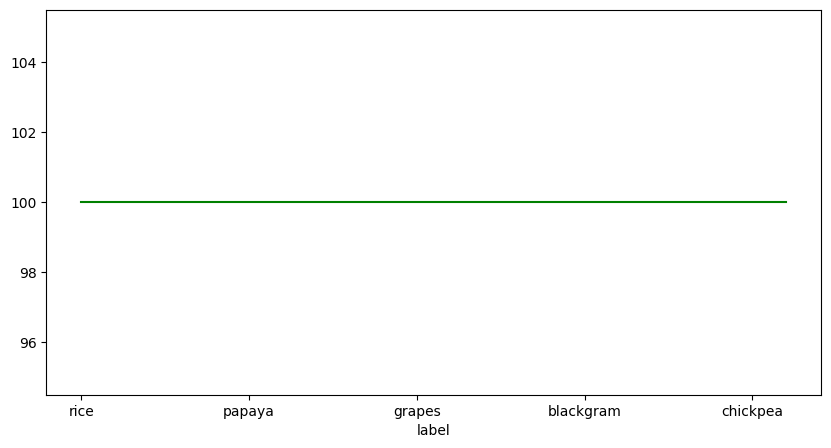

In [62]:
# Target Feature distribution

crop['label'].value_counts().plot(kind='line', color='green', figsize=(10, 5))

In [46]:
features = crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


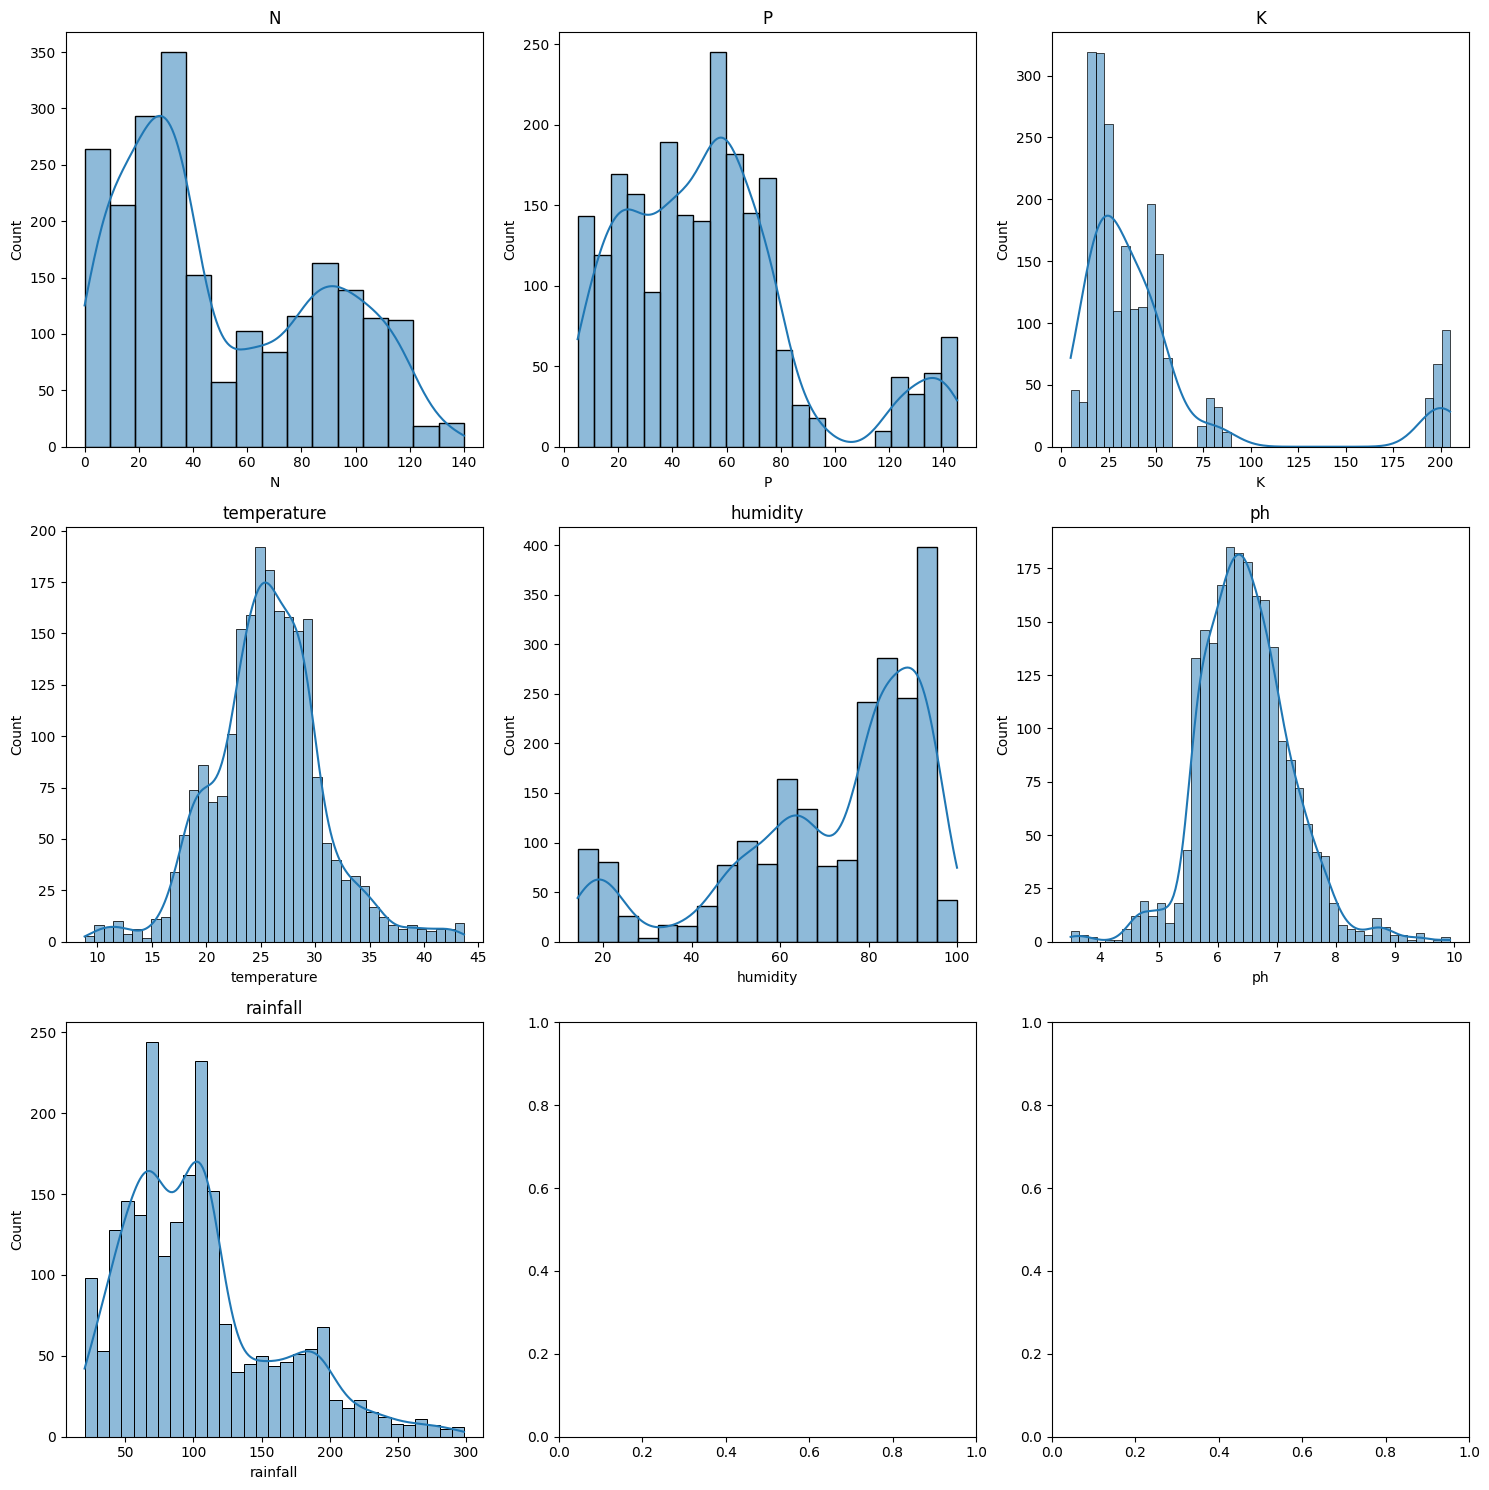

In [47]:
#visualize distribution of each feature 


import seaborn as sns
fig, ax =plt.subplots(3,3,figsize=(15,15))
for i ,subplot in zip(features, ax.flatten()):
    sns.histplot(data=crop, x=i, ax=subplot, kde =True)
    subplot.title.set_text(i)
plt.tight_layout()
plt.show()


In [48]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

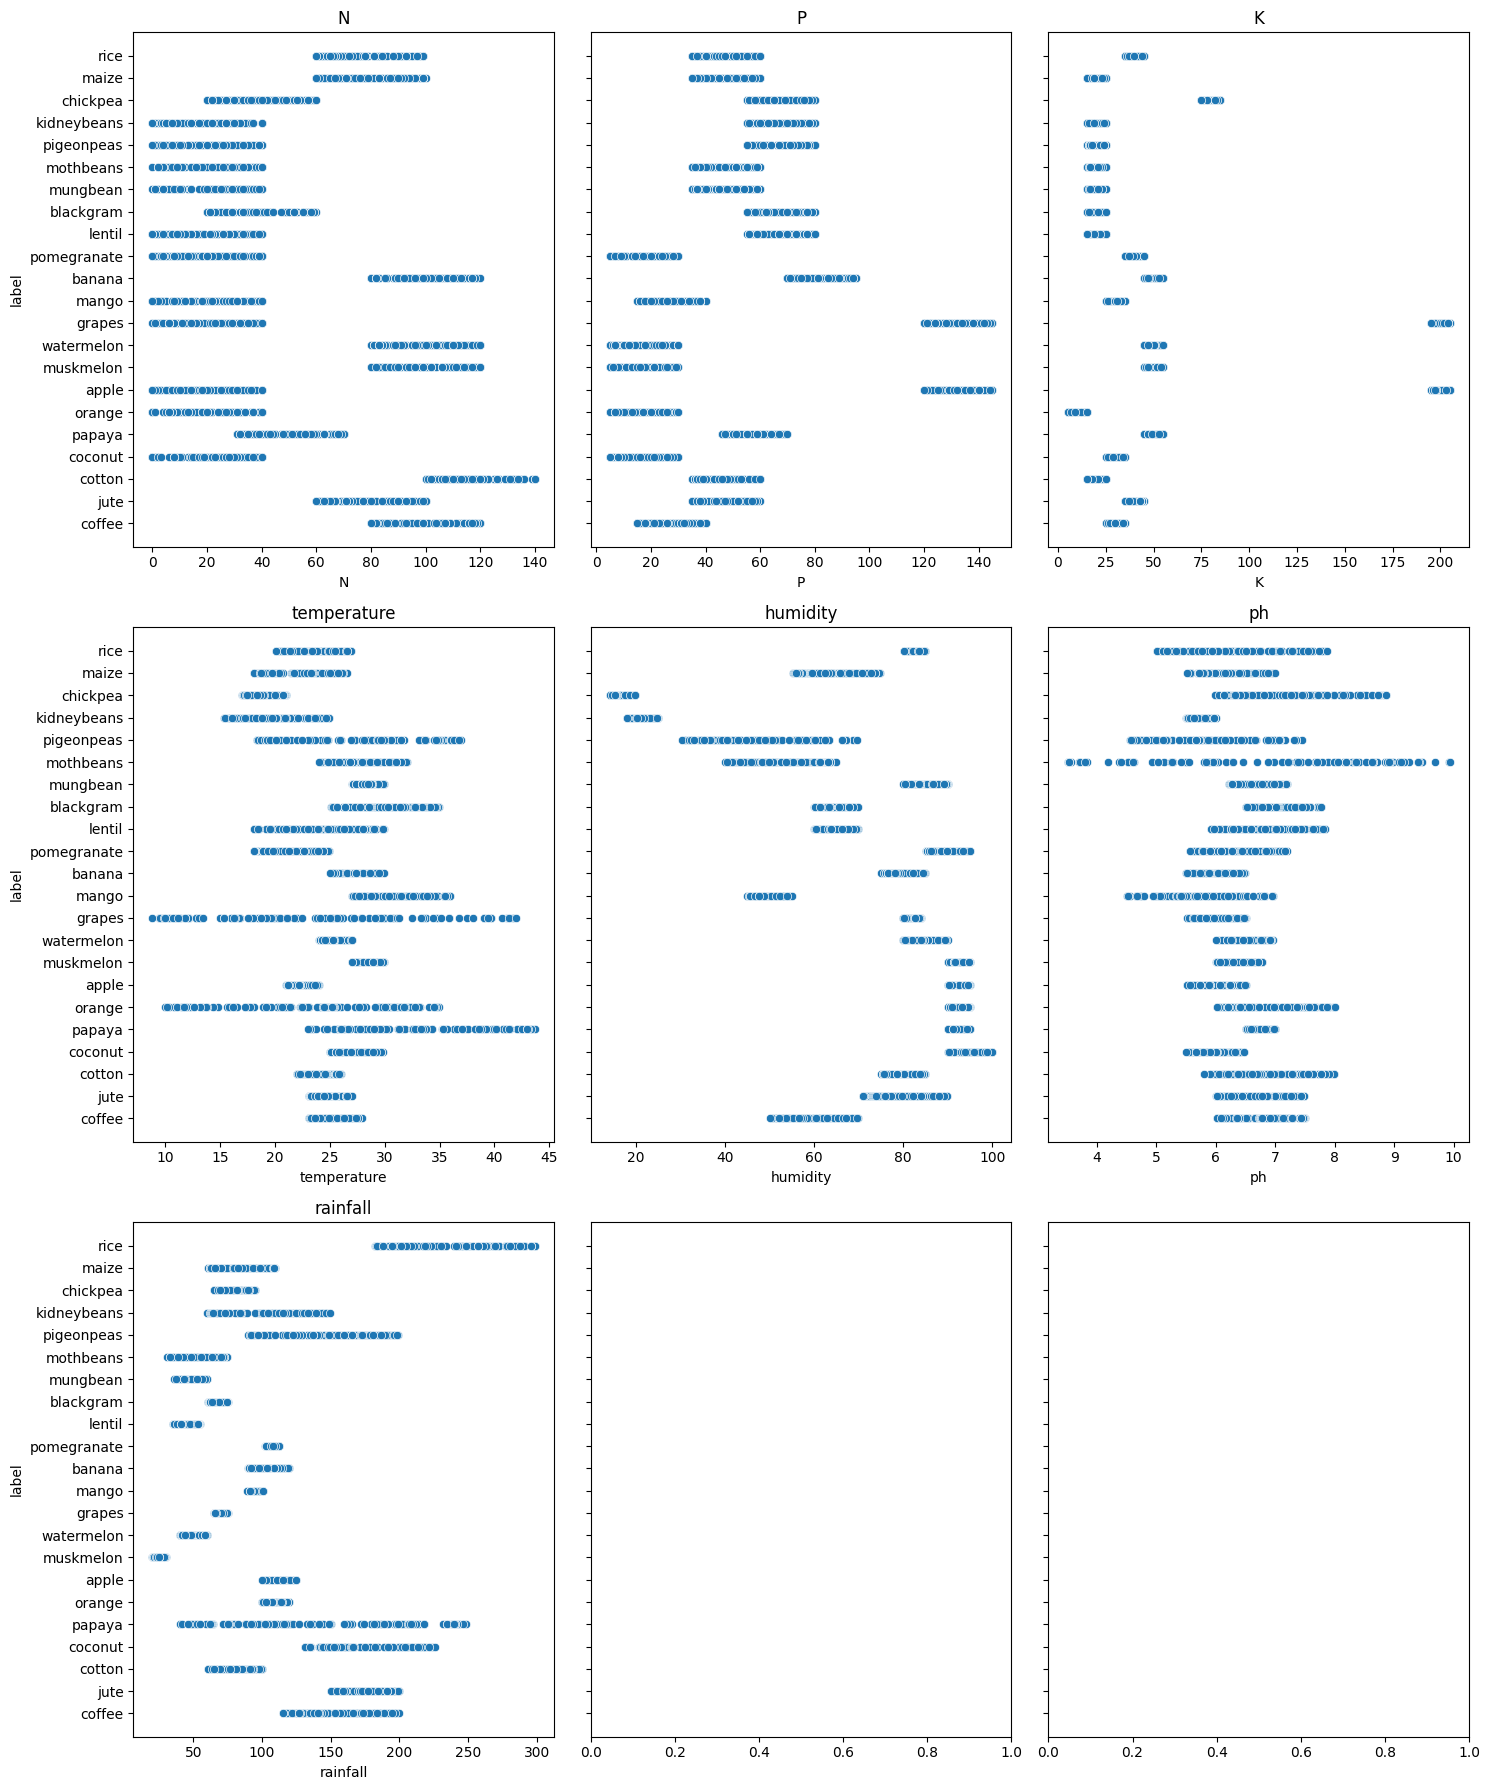

In [49]:
#Scatterplotting
import seaborn as sns
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
fig, ax = subplots(3,3,figsize=(15,18),sharey="all")
for i,subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data =crop,ax=subplot)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

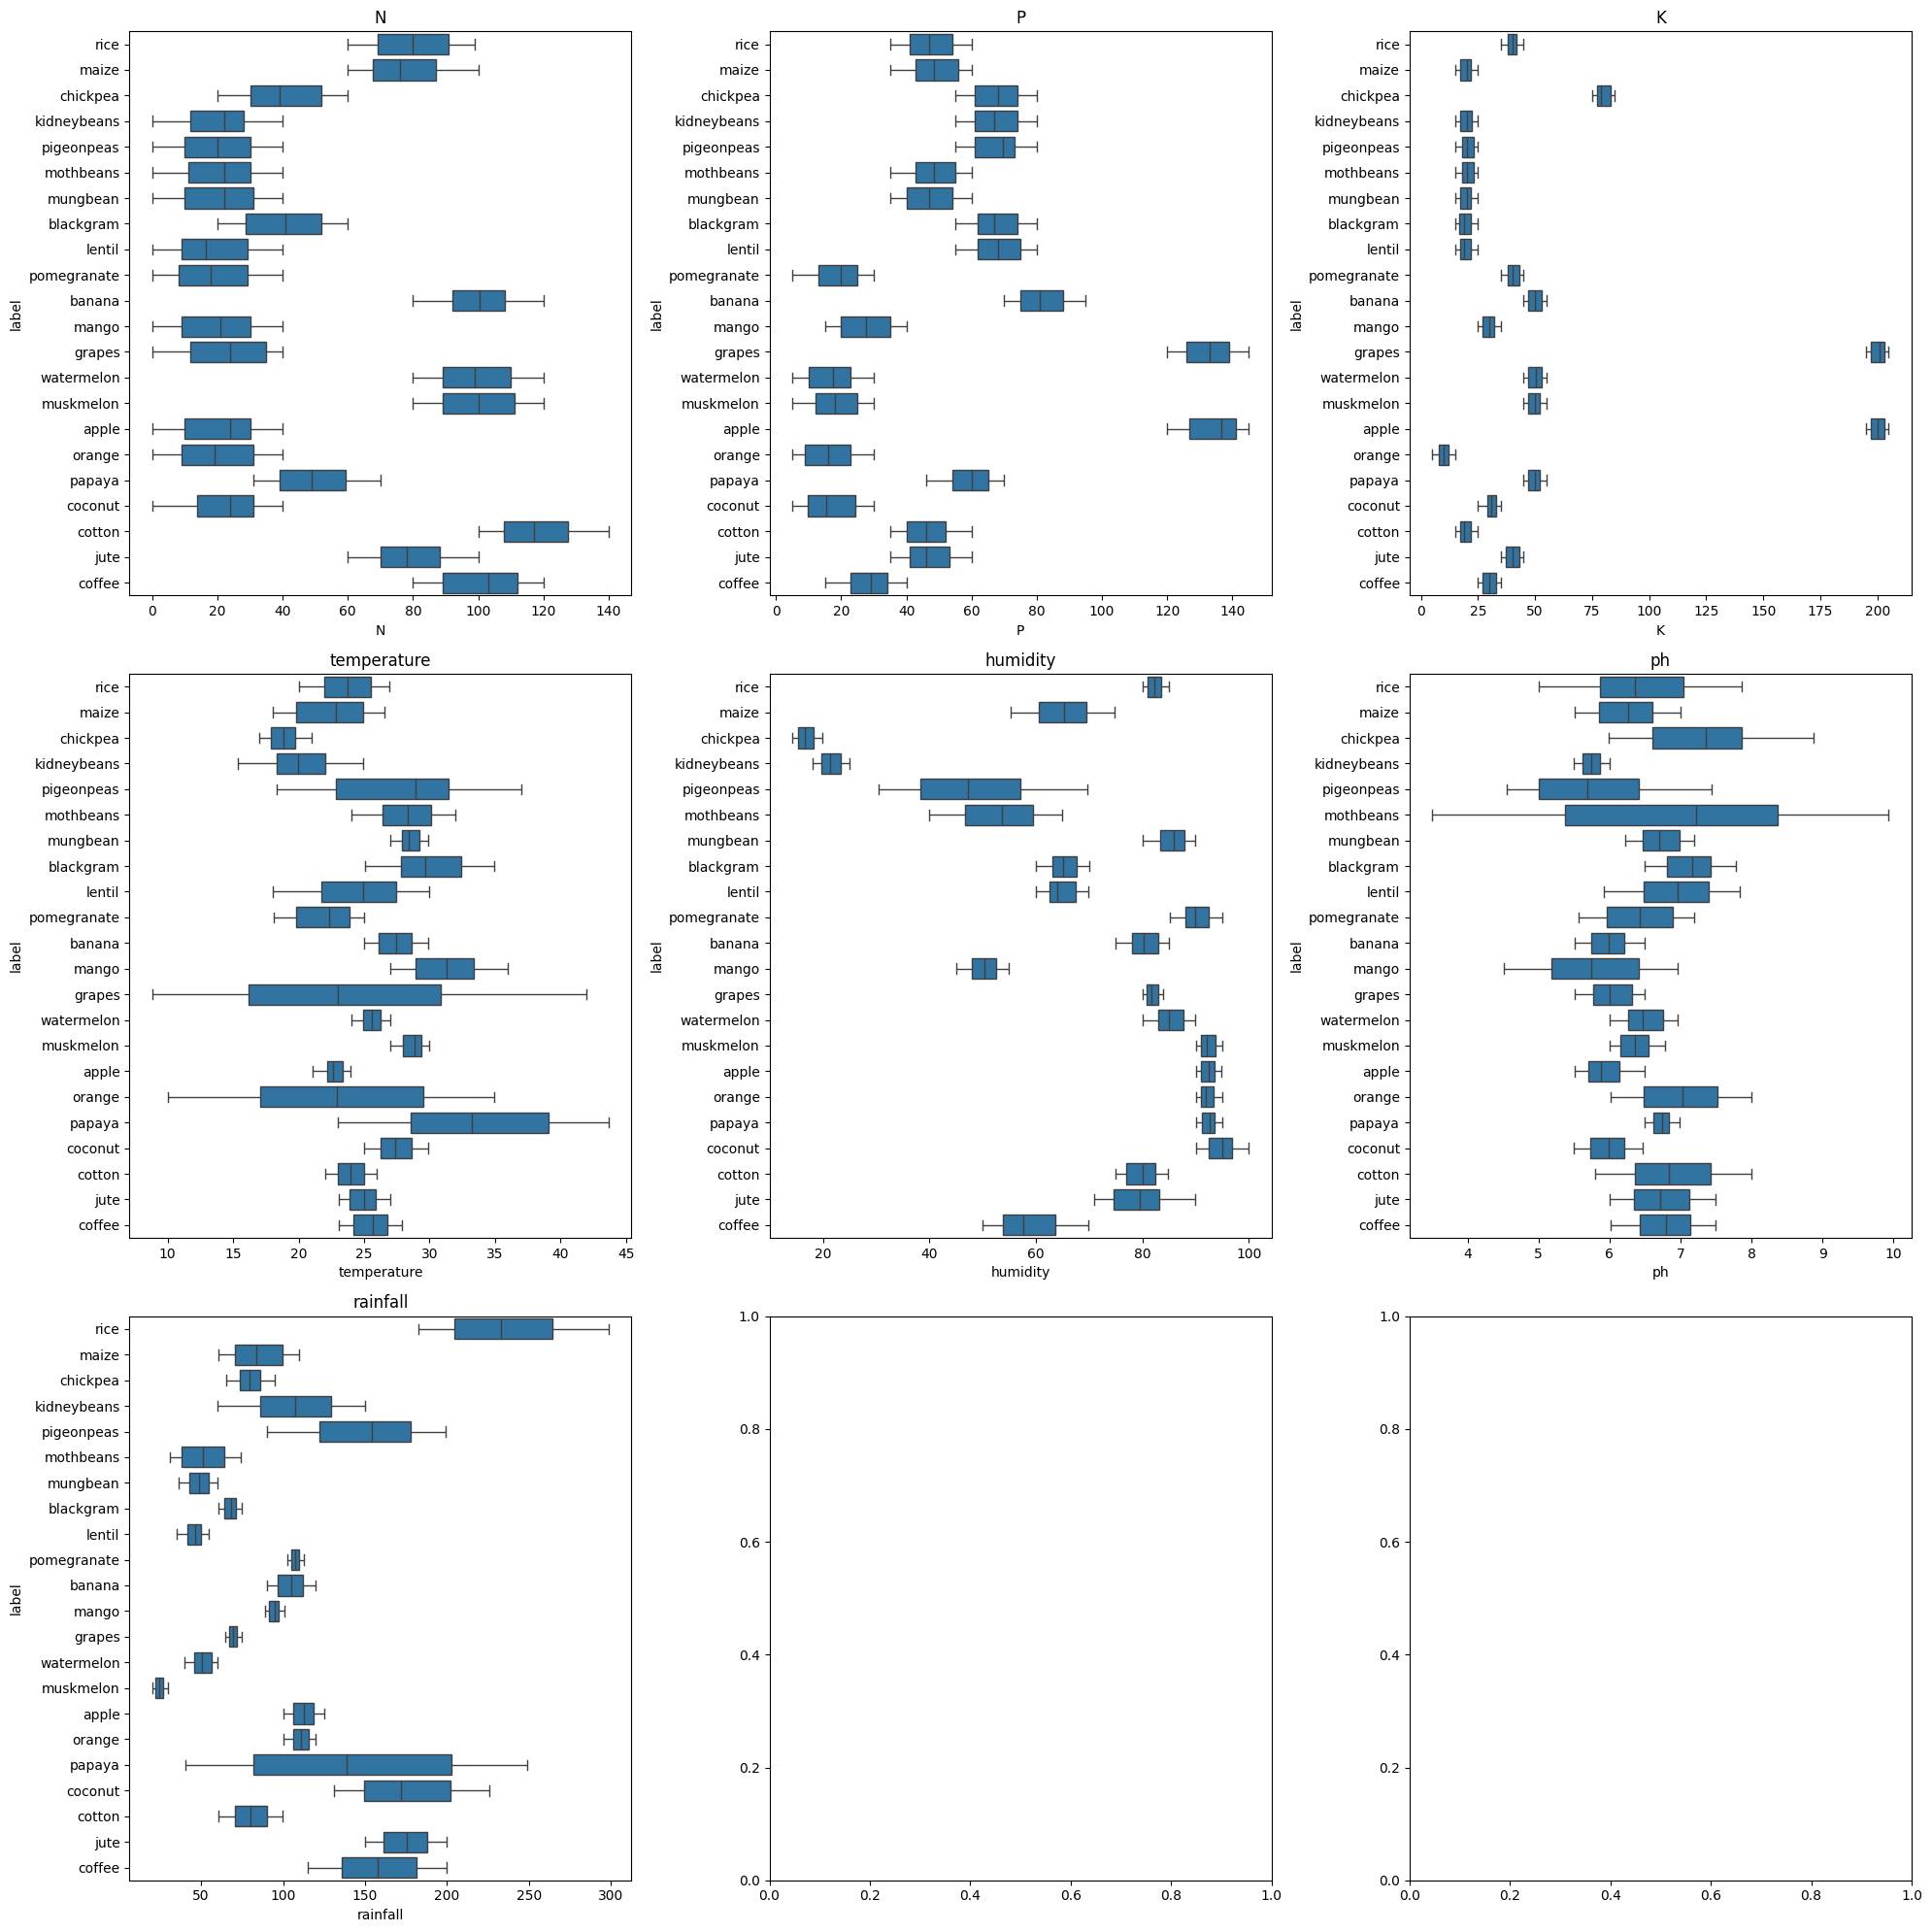

In [50]:
#finding outliers Box plotting

import seaborn as sns
fig, ax =subplots(3,3, figsize=(20,20))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(x=i, y='label',data=crop, ax=subplot)
    subplot.set_title(i)
plt.tight_layout()
plt.show()



In [51]:
# Correlations between Features

num_cols = crop.select_dtypes(include=[np.number])
num_cols




,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [52]:
#Correlation Matrix

corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


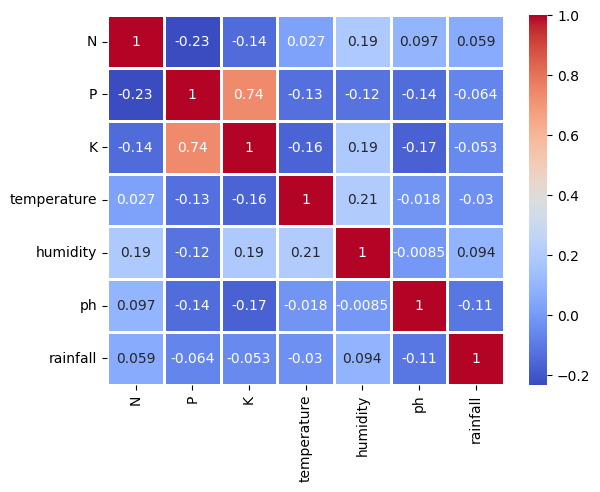

In [53]:
#Visualising with Heatmap

sns.heatmap(corr, annot=True ,cmap='coolwarm',linewidths=0.8)
plt.show()

### Encoding


In [54]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [55]:
crop_dict = {
    'rice': 0,
    'maize': 1,
    'chickpea': 2,
    'kidneybeans': 3,
    'pigeonpeas': 4,
    'mothbeans': 5,
    'mungbean': 6,
    'blackgram': 7,
    'lentil': 8,
    'pomegranate': 9,
    'banana': 10,
    'mango': 11,
    'grapes': 12,
    'watermelon': 13,
    'muskmelon': 14,
    'apple': 15,
    'orange': 16,
    'papaya': 17,
    'coconut': 18,
    'cotton': 19,
    'jute': 20,
    'coffee': 21
}

In [64]:
crop['crop_no'] = crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0


In [57]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,21


In [121]:
crop.drop('label', axis = 1, inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,21


In [122]:
x = crop.drop('crop_no',axis=1)
y = crop['crop_no']

print(f"The shape of x is : {x.shape}")
print(f"The shape of y is : {y.shape}")

The shape of x is : (2200, 7)
The shape of y is : (2200,)


### Test-Train Splitting 

In [125]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, random_state=42)

In [127]:
print(f"Shape of x_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (1760, 7)
Shape of y_train: (1760,)
Shape of x_test: (440, 7)
Shape of y_test: (440,)


In [128]:
#Scaling

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

#### Training efficiecny

In [134]:
#Training
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# intialize the DecisionTree Classifier
DT = DecisionTreeClassifier()

# Train the model
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [136]:
# evaluate the model on train dataset
y_pred_train = DT.predict(X_train)
print(f"Accuracy score of Decision Tree Classifier is: {accuracy_score(y_train,y_pred_train)}")

Accuracy score of Decision Tree Classifier is: 1.0


In [155]:
# evaluate the model on test dataset
y_pred_test = DT.predict(X_test)
# Create DataFrame with actual vs predicted values
predictions_df = pd.DataFrame({'Actual Crop': y_test, 'Predicted Crop': y_pred_test})

# Display first 10 rows
print(predictions_df.head(10))
print(f"Accuracy score of Decision Tree Classifier is: {accuracy_score(y_test,y_pred_test)}")

      Actual Crop  Predicted Crop
1451           14              14
1334           13              13
1761           17              17
1735           17              17
1576           15              15
1110           11              11
1594           15              15
530             5               5
651             6               6
819             8               8
Accuracy score of Decision Tree Classifier is: 0.9840909090909091


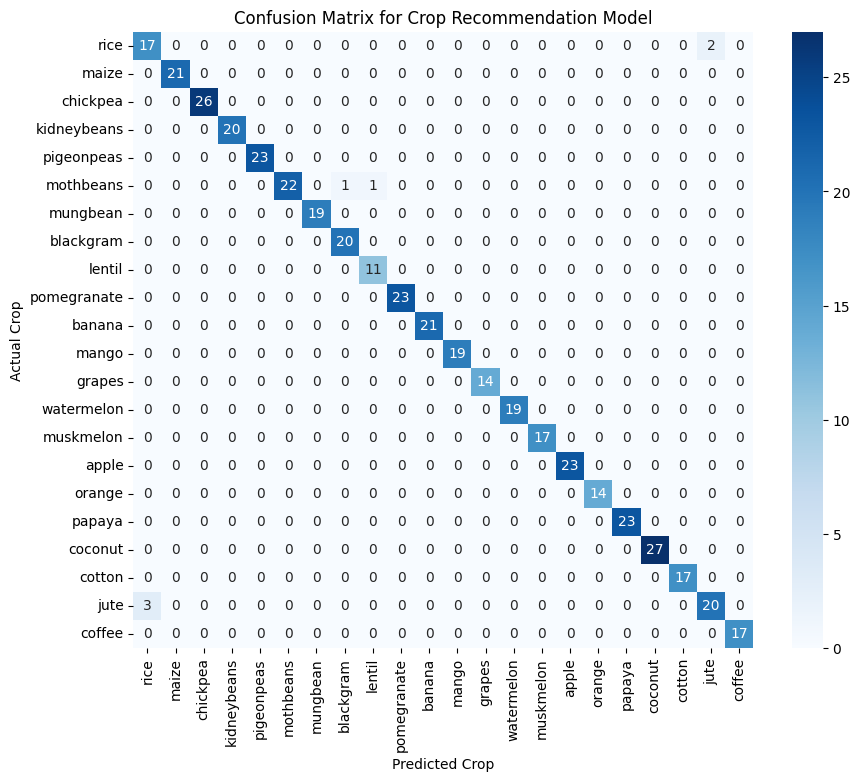

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Crop label mapping
crop_dict = {
    0: 'rice', 1: 'maize', 2: 'chickpea', 3: 'kidneybeans', 4: 'pigeonpeas',
    5: 'mothbeans', 6: 'mungbean', 7: 'blackgram', 8: 'lentil', 9: 'pomegranate',
    10: 'banana', 11: 'mango', 12: 'grapes', 13: 'watermelon', 14: 'muskmelon',
    15: 'apple', 16: 'orange', 17: 'papaya', 18: 'coconut', 19: 'cotton',
    20: 'jute', 21: 'coffee'
}

# Convert dictionary values to a list for axis labels
crop_labels = list(crop_dict.values())

# Display confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=crop_labels, yticklabels=crop_labels)
plt.xlabel('Predicted Crop')
plt.ylabel('Actual Crop')
plt.title('Confusion Matrix for Crop Recommendation Model')
plt.show()


### Performance Evaluation


#### F1 Score

In [166]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_test, average='weighted')
print(f'F1 Score: {f1:.2f}')


F1 Score: 0.98


#### Recall/Sensitivity

In [165]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred_test, average='weighted')
print(f'Recall: {recall:.2f}')


Recall: 0.98


#### Accuracy

In [164]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.98


#### Precision

In [163]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_test, average='weighted')  # Use 'macro' for unweighted
print(f'Precision: {precision:.2f}')


Precision: 0.98


### Predictions

In [ ]:

def Crop_rec(N, P, K, temp, ph, rain , hum):
    features = np.array([[N, P, K, temp, ph, rain, hum]])
    transformed_features = scalar.transform(features)
    prediction = DT.predict(transformed_features).reshape(1, -1)
    crop_dict = {
    0:'rice',
    1:'maize',
    2:'chickpea',
    3:'kidneybeans',
    4:'pigeonpeas',
    5:'mothbeans',
    6:'mungbean',
    7:'blackgram',
    8:'lentil',
    9:'pomegranate',
    10:'banana',
    11:'mango',
    12:'grapes',
    13:'watermelon',
    14:'muskmelon',
    15:'apple',
    16:'orange',
    17:'papaya',
    18:'coconut',
    19:'cotton',
    20:'jute',
    21:'coffee'
}
    crop = [crop_dict[i] for i in prediction[0]]

    return f"{crop} is the best crop to grow"

In [ ]:
#pedicting with values
Crop_rec(N=90, P=45, K = 43, temp = 20, hum = 82, ph = 6.1, rain= 282)

C:\Users\deepa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\deepa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


"['muskmelon'] is the best crop to grow"

In [149]:
crop

,N,P,K,temperature,humidity,ph,rainfall,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21


In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure model is trained before extracting feature importance
feature_importance = DT.feature_importances_  
features = X_train.columns  


In [158]:
# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importance = feature_importance[sorted_indices]


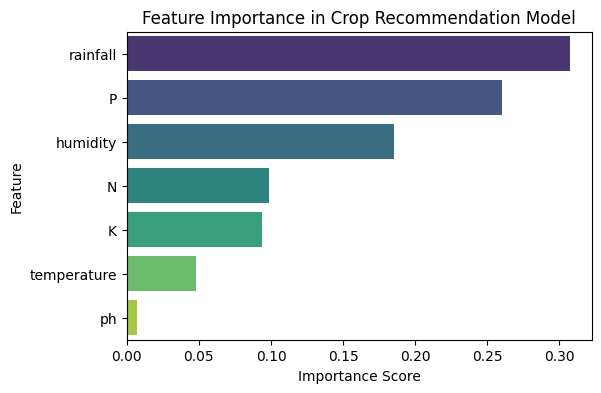

In [161]:
# Plot feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x=sorted_importance, y=sorted_features, hue=sorted_features, palette="viridis", legend=False)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Crop Recommendation Model")
plt.show()
